In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
carprice = pd.read_csv(r'car data.xls')
# Top5 rowrs of dataset
carprice.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# bottom 5 rows of dataset
carprice.tail(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [4]:
carprice.shape

print('Number of Rows : ', carprice.shape[0])
print('Number of columns : ',carprice.shape[1])

Number of Rows :  301
Number of columns :  9


In [5]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# Cheking null values in data
carprice.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#get overall statistics about dataset
carprice.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# Data preprocessing
carprice.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


In [9]:
# Creating new feature age of car basis of current year and year feature 
import datetime


In [10]:
date_time = datetime.datetime.now()
date_time.year


2025

In [11]:
carprice['Age'] = date_time.year - carprice['Year']
carprice = carprice.drop(columns=['Year'])
carprice.head(2)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,12


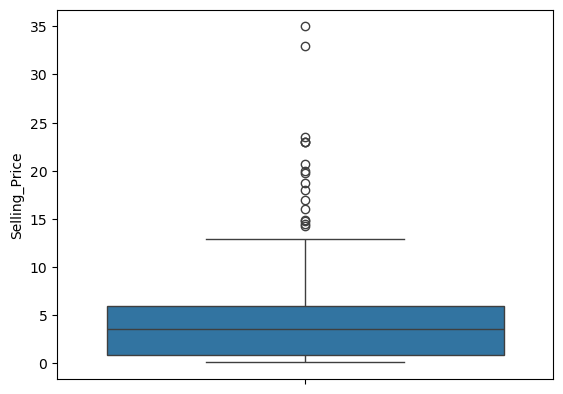

In [12]:
# Checking outliers
from sqlalchemy import literal


sns.boxplot(carprice['Selling_Price'])
plt.show()

In [13]:
carprice = carprice[~(carprice['Selling_Price']>=33.0) & (carprice['Selling_Price']<=35.0)]
carprice.head()
carprice.shape

(299, 9)

In [14]:
# Encoding the categorical columns 
carprice['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [15]:
carprice['Fuel_Type'] = carprice['Fuel_Type'].map({'Petrol': 0, 'Diesel' : 1, 'CNG':2})

In [16]:
carprice['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [17]:
carprice['Seller_Type'] = carprice['Seller_Type'].map({'Dealer' : 0, 'Individual':1})    

In [18]:
carprice['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [19]:
carprice['Transmission'] = carprice['Transmission'].map({'Manual':0, 'Automatic':1})

In [20]:
carprice.head(4)

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,0,0,0,0,11
1,sx4,4.75,9.54,43000,1,0,0,0,12
2,ciaz,7.25,9.85,6900,0,0,0,0,8
3,wagon r,2.85,4.15,5200,0,0,0,0,14


In [21]:
X = carprice.drop(columns=['Car_Name','Selling_Price'])
y = carprice['Selling_Price']

In [22]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor, train


model ={ 
    'a' : ['LinearRegression',LinearRegression()],
    'b' : ['RandomForestRegressor',RandomForestRegressor()],
    'c' : ['GradientBoostingRegressor',GradientBoostingRegressor()],
    'd' : ['XGBRegressor',XGBRegressor()]

    }

for i in model:
    model[i][1].fit(X_train,y_train)
    print(model[i][1].fit(X_train,y_train))

# lr = LinearRegression()
# lr.fit(X_train,y_train)

# rfr = RandomForestRegressor()
# rfr.fit(X_train,y_train)

# gbr = GradientBoostingRegressor()
# gbr.fit(X_train,y_train)

# xgbr = XGBRegressor()
# xgbr.fit(X_train,y_train)


LinearRegression()
RandomForestRegressor()
GradientBoostingRegressor()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)


In [24]:
model['a'][1]

LinearRegression()

In [25]:
y_pred1 = model['a'][1].predict(X_test)
# y_pred2 = rfr.predict(X_test)
# y_pred3 = gbr.predict(X_test)
# y_pred4 = xgbr.predict(X_test)


In [26]:
def print_score(model, X_train,y_train,X_test,y_test):
    # Evaluate the model on the training data
    train_score = model.score(X_train, y_train)
    print("Training Score:", train_score)

    # Evaluate the model on the test data
    test_score = model.score(X_test, y_test)
    print("Test Score:", test_score)    
    
    return train_score, test_score



In [27]:
for i in model:
    print_score(model[i][1],X_train,y_train,X_test,y_test)
    print('-'*40)

Training Score: 0.9047292287994998
Test Score: 0.6790884983129404
----------------------------------------
Training Score: 0.9941538395223092
Test Score: 0.7359899164238854
----------------------------------------
Training Score: 0.9956065406915807
Test Score: 0.8828620255976997
----------------------------------------
Training Score: 0.999995097371823
Test Score: 0.8887471822279068
----------------------------------------


In [28]:

from sklearn.metrics import make_scorer,r2_score
from sklearn.model_selection import KFold, cross_val_score


for i in model:

    kf = KFold(n_splits=5,shuffle=True,random_state=42)
    r2 = make_scorer(r2_score)
    score_r2 = cross_val_score(model[i][1],X,y,cv=kf,scoring=r2)
    print('Model Name : ', model[i][0])
    print('Score : ',score_r2.mean())
    print('-'*25)


Model Name :  LinearRegression
Score :  0.8338355469788767
-------------------------
Model Name :  RandomForestRegressor
Score :  0.9229118006049225
-------------------------
Model Name :  GradientBoostingRegressor
Score :  0.9474222632808867
-------------------------
Model Name :  XGBRegressor
Score :  0.9427675573382011
-------------------------


In [29]:
xg =XGBRegressor()
xg_final = xg.fit(X,y)

In [30]:
import joblib


In [31]:
joblib.dump(xg_final,"Car Price Prediction")

['Car Price Prediction']

In [32]:
carprice.keys()

Index(['Car_Name', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'Age'],
      dtype='object')

In [33]:
model_load = joblib.load("Car Price Prediction")

In [34]:
import pandas as pd 
data_new  = pd.DataFrame({
'Present_Price' : 5.59 , 
'Kms_Driven' : 0, 
'Fuel_Type' : 0,
'Seller_Type' : 0, 
'Transmission' : 0, 
'Owner' : 0, 
'Age' : 0
    
},index=[0])

In [35]:
model_load.predict(data_new)

array([3.657032], dtype=float32)

# Create GUI

In [36]:

import tkinter as tk
from tkinter import ttk,messagebox
from tkinter import font

def predict():

    try:

        # Collect inputs
        present_price = float(entry_price.get())/100000
        kms_driven = float(entry_kms.get())
        fuel_type = combo_fuel.get()
        seller_type = combo_seller.get()
        transmission = combo_trans.get()
        owner = int(combo_owner.get())
        age = int(entry_age.get())

        # Convert categorical inputs to numeric
        fuel_mapping = {'Petrol': 0, 'Diesal': 1, 'CNG': 2}
        seller_mapping = {'Individual': 0, 'Dealer': 1}
        transmission_mapping = {'Manual': 0, 'Automatic': 1}


        fuel_type = fuel_mapping[fuel_type]
        seller_type = seller_mapping[seller_type]
        transmission = transmission_mapping[transmission]

        # Prepare input for model
        model_input = [[present_price, kms_driven, fuel_type, seller_type, transmission, owner, age]]


        #Load the model
        model_load = joblib.load("Car Price Prediction")

        #Make Prediction

        prediction = model_load.predict(model_input)
        prediction = (str(prediction*100000)[1:-1])
        label_output.config(text=f"{float(prediction):.2f}")
     
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")
       

root = tk.Tk()
root.title('Car Price Prediction')
root.geometry('300x400')

frame1 = ttk.Frame(root,padding=10)
frame1.grid(row = 0 , column=0)

label_title = ttk.Label(frame1,text='Car Price Prediction',font=(20))
label_title.grid(row=0,column=0,sticky='nsew')

frame2 = ttk.Frame(root,padding=10)
frame2.grid(row = 1 , column=0)


labels = ["Present Price", "Kms Driven", "Fuel Type", "Seller Type", "Transmission", "Owner", "Age"]


entry_price = ttk.Entry(frame2)
entry_kms = ttk.Entry(frame2)
combo_fuel = ttk.Combobox(frame2, values=['Petrol','Diesal']) 
combo_seller = ttk.Combobox(frame2, values= ['Individual','Dealer'])
combo_trans = ttk.Combobox(frame2,values=['Manual','Automatic'])
combo_owner = ttk.Combobox(frame2,values=[0,1,2,3,4,5,6])
entry_age = ttk.Entry(frame2)


widgets = [entry_price,entry_kms,combo_fuel,combo_seller,combo_trans,combo_owner,entry_age ]


for i , label in enumerate(labels):
    ttk.Label(frame2,text=label).grid(row=i, column=0, padx=10, pady=5, sticky="w")
    widgets[i].grid(row=i, column=1, padx=10, pady=5, sticky="ew")

predict_button = ttk.Button(frame2,text="Predict",command=predict)
predict_button.grid(row=len(labels),column=1,columnspan=1,padx=10, pady=5,sticky='we')

label_result = ttk.Label(frame2,text= "Expected Price : ")
label_result.grid(row=len(labels)+1,column=0,padx=10, pady=5,sticky='w')

label_output = ttk.Label(frame2,font=('Arial',10,'bold'))
label_output.grid(row = len(labels)+1, padx=10, pady=5, column=1)

root.mainloop()

In [37]:
import tkinter as tk
from tkinter import ttk

root = tk.Tk()
root.title("Styled Entry Box")

style = ttk.Style()

style.configure("TEntry", font=("Helvetica", 12), padding=5, fieldbackground="lightblue", foreground="darkblue")

entry = ttk.Entry(root)
entry.grid(row=0, column=0, padx=10, pady=10)

root.mainloop()